In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

In [1]:
# Load the dataset
file_path = "E:\CV & resume\spam.csv"
 # Adjust encoding if needed

In [12]:
df = pd.read_csv(file_path, encoding='latin1')


In [13]:
# Data Cleaning
df['v2'] = df['v2'].str.lower() 


In [15]:
import string

# Example: Remove punctuation
df['v2'] = df['v2'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))


In [17]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VICTUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [18]:
from nltk.corpus import stopwords

# Example: Remove stopwords
stop_words = set(stopwords.words('english'))
df['v2'] = df['v2'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))


In [20]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VICTUS\AppData\Roaming\nltk_data...


True

In [21]:
from nltk.stem import WordNetLemmatizer

# Example: Lemmatization
lemmatizer = WordNetLemmatizer()
df['v2'] = df['v2'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


In [22]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0, 0.5, 'Count')

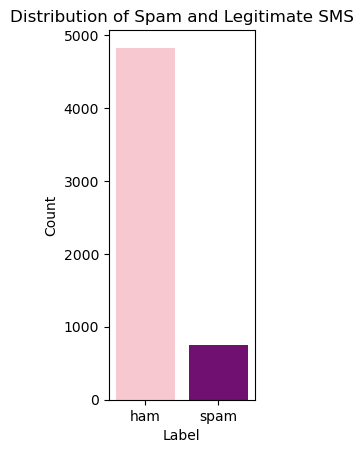

In [24]:
# Bar graph: Distribution of Spam and Legitimate SMS
plt.subplot(1, 3, 1)
sns.countplot(x='v1', data=df, palette={'ham': 'pink', 'spam': 'purple'})
plt.title('Distribution of Spam and Legitimate SMS')
plt.xlabel('Label')
plt.ylabel('Count')


Text(0, 0.5, 'Message Length')

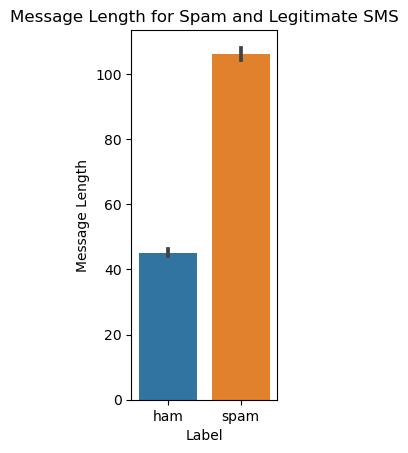

In [27]:
# Bar graph: Message length for Spam and Legitimate SMS
plt.subplot(1, 3, 2)
df['message_length'] = df['v2'].apply(len)
sns.barplot(x='v1', y='message_length', data=df)
plt.title('Message Length for Spam and Legitimate SMS')
plt.xlabel('Label')
plt.ylabel('Message Length')

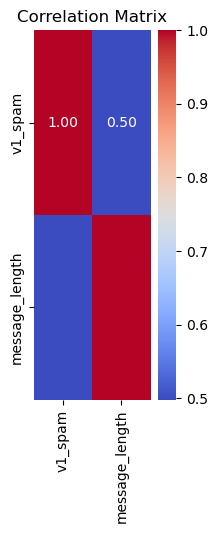

In [29]:
# One-hot encode the 'v1' column
df_encoded = pd.get_dummies(df, columns=['v1'], drop_first=True)

# Create a correlation matrix
corr_matrix = df_encoded[['v1_spam', 'message_length']].corr()

# Heatmap: Correlation matrix
plt.subplot(1, 3, 3)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [32]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [33]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['v2'], df['v1'], test_size=0.2, random_state=42)

In [34]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.85)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


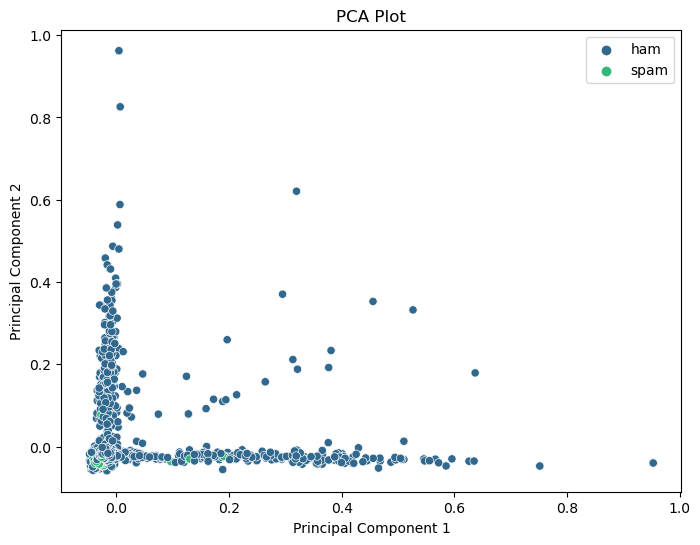

In [35]:
# Principal Component Analysis (PCA) plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_tfidf.toarray())
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train, palette='viridis')
plt.title('PCA Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [40]:
# Initialize and train the Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [41]:
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_tfidf)


In [42]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


In [43]:
# Display results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9802690582959641
Confusion Matrix:
[[963   2]
 [ 20 130]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.98      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [44]:
# Example: Fine-tuning the SVM classifier
svm_classifier_tuned = SVC(kernel='linear', C=1.0, gamma='scale')  # Adjust hyperparameters as needed
svm_classifier_tuned.fit(X_train_tfidf, y_train)
y_pred_tuned = svm_classifier_tuned.predict(X_test_tfidf)

# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
classification_rep_tuned = classification_report(y_test, y_pred_tuned)

# Display results for the tuned model
print(f'Tuned Model Accuracy: {accuracy_tuned}')
print(f'Tuned Model Confusion Matrix:\n{conf_matrix_tuned}')
print(f'Tuned Model Classification Report:\n{classification_rep_tuned}')


Tuned Model Accuracy: 0.9802690582959641
Tuned Model Confusion Matrix:
[[963   2]
 [ 20 130]]
Tuned Model Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.98      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [45]:
from sklearn.model_selection import cross_val_score

# Example: Cross-validation for the SVM classifier
cross_val_scores = cross_val_score(svm_classifier, X_train_tfidf, y_train, cv=5)  # Adjust cv as needed
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean Cross-Validation Accuracy: {cross_val_scores.mean()}')


Cross-Validation Scores: [0.98206278 0.97982063 0.97306397 0.97194164 0.97306397]
Mean Cross-Validation Accuracy: 0.9759905985616001


In [48]:
from sklearn.model_selection import GridSearchCV

# Example: Grid search for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5)
grid_search.fit(X_train_tfidf, y_train)

# Display the best parameters found by grid search
print(f'Best Parameters: {grid_search.best_params_}')

# Evaluate the model with the best parameters
y_pred_grid = grid_search.predict(X_test_tfidf)
accuracy_grid = accuracy_score(y_test, y_pred_grid)
conf_matrix_grid = confusion_matrix(y_test, y_pred_grid)
classification_rep_grid = classification_report(y_test, y_pred_grid)

# Display results for the tuned model with grid search
print(f'Tuned Model with Grid Search Accuracy: {accuracy_grid}')
print(f'Tuned Model with Grid Search Confusion Matrix:\n{conf_matrix_grid}')
print(f'Tuned Model with Grid Search Classification Report:\n{classification_rep_grid}')


Best Parameters: {'C': 10, 'gamma': 'scale'}
Tuned Model with Grid Search Accuracy: 0.9775784753363229
Tuned Model with Grid Search Confusion Matrix:
[[960   5]
 [ 20 130]]
Tuned Model with Grid Search Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       965
        spam       0.96      0.87      0.91       150

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [49]:
# Display the best parameters found by grid search
print(f'Best Parameters: {grid_search.best_params_}')


Best Parameters: {'C': 10, 'gamma': 'scale'}


In [50]:
# Evaluate the final tuned model on the test set
y_pred_final = grid_search.predict(X_test_tfidf)
accuracy_final = accuracy_score(y_test, y_pred_final)
conf_matrix_final = confusion_matrix(y_test, y_pred_final)
classification_rep_final = classification_report(y_test, y_pred_final)

# Display results for the final tuned model
print(f'Final Tuned Model Accuracy: {accuracy_final}')
print(f'Final Tuned Model Confusion Matrix:\n{conf_matrix_final}')
print(f'Final Tuned Model Classification Report:\n{classification_rep_final}')


Final Tuned Model Accuracy: 0.9775784753363229
Final Tuned Model Confusion Matrix:
[[960   5]
 [ 20 130]]
Final Tuned Model Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       965
        spam       0.96      0.87      0.91       150

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [53]:
# Get coefficients and their corresponding feature names
coefficients = grid_search.best_estimator_.coef_.toarray().flatten()
features_coefficients = list(zip(feature_names, coefficients))

# Display the top N features with the highest coefficients
top_features = sorted(features_coefficients, key=lambda x: x[1], reverse=True)[:10]
print(f'Top 10 features and their coefficients:\n{top_features}')


Top 10 features and their coefficients:
[('07090201529', 3.5947736760083315), ('claim', 2.808706870682268), ('service', 2.4696540189822733), ('mobile', 2.3381912805035254), ('txt', 2.2876672105707687), ('urgent', 2.2803168346802387), ('filthy', 2.2605669806040933), ('150', 2.2194686201444824), ('88066', 2.105558376972592), ('ringtone', 2.0137692008722112)]
